Simulation of the LIF model

In [1]:
# Importing relevant modules
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.integrate as integrate

# Defining the variables in Eq.2
Tau = 20 * (10 ** (-3))
E_0 = -60 * (10 ** (-3))
V_re = -55 * (10 ** (-3))
V_th = 50 * (10 ** (-3))
sigma = 4 * (10 ** (-3))

# Calculating time steps for the simulation
dt = 0.01 * (10 ** (-3))
T = 1000 * (10 ** (-3))
time_steps = round(T/dt)
print(time_steps)

# Defining a vector for V
V = np.zeros(time_steps + 1)

100000


The firing rate is r:708.0
This code needs to be run multiple times to see anything meaningful
The blue line is the voltage and the red line is the threshold voltage


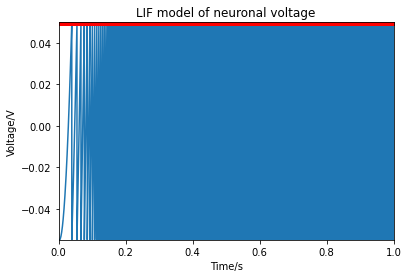

In [3]:

# Simulating Equation 2
# NOTES: Need to implement the zeta function properly

# I have used V_re for the intial voltage, I'me not sure if this is correct.
V[0] = V_re

# Keeping count of the number of firings 
Firings = 0
# The firing rate 'r'
r = 0

# Calculating Gaussian white noise (zeta term), I have precalculated the white noise.
# Mean = 0, standard deviation = 1
noise = np.random.normal(loc = 0, scale = 1, size = time_steps)

for i in range(1, time_steps):
    # Euler integration to find V
    V[i] = V[i-1] + dt * ((Tau) ** (-1)) * (E_0 - V[i] + sigma * math.sqrt( 2 * Tau ) * noise[i])

    # Code to reset the voltage to the rest voltage and to count the number of firings
    
    if V[i] >= V_th:
      V[i] = V_re
      Firings += 1    
  
    
# Calculating the firing rate
r = Firings / T
print(f"The firing rate is r:{r}")

# Plotting the voltage over time
# On some occasions the plot is empty on other occassions the plot has an upward curve to it.


plt.plot( np.linspace(0, T, time_steps + 1), V)
plt.plot( np.linspace(0, T, time_steps + 1), V_th * np.ones(time_steps + 1 ), 'ro')
plt.xlabel("Time/s")
plt.ylabel("Voltage/V")
plt.title("LIF model of neuronal voltage")
plt.axis([0, T, V_re, np.max(V)])

print("This code needs to be run multiple times to see anything meaningful")
print("The blue line is the voltage and the red line is the threshold voltage")

Finding the firing rate using Eq. 16

In [6]:

# Defining variables.

x_th = (V_th - E_0) / sigma
x_re = (V_re - E_0) / sigma
print(x_th, x_re)

# Using scipy integrate to find Z.
# I am having trouble with this as the integrand diverges to infinity.
Z = integrate.quad(lambda z : (z ** -1) * (( math.exp(x_th * z) - math.exp(x_re * z) ) * math.exp( (-1/2) * (z ** 2) )) ,0 ,10 )
print(f" Z = {Z}, The first number is the value of Z and the second the error of integration")
print("This is too high and increases with increasing domain of integration, suggests divergence of the integral")

# Calculating the firing rate
# r = ( Tau * Z ) ** (-1)

27.5 1.2499999999999993
 Z = (2.9805791709548576e+95, 3.798703467090728e+82), The first number is the value of Z and the second the error of integration
This is too high and increases with increasing domain of integration, suggests divergence of the integral


In [8]:

# Trying to find out why the integrand in Eq. 16 diverges.
z = 10
print(math.exp( (-1/2) * ( z ** 2 ) ) * math.exp( x_th * z ) * (z ** (-1) ))
print("This is very high")

5.203055137884855e+96
This is very high
